In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!pip install geopandas
!pip install contextily
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 52.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
province = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/ProvCM01012022_WGS84.zip')
corsi = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/Corsi_acqua_Piano_di_Gestione.zip')
comuni = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/Com01012022_WGS84.zip')
quartieri = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/POLISENO RICCARDO - ds964_nil_wm.zip')
province3857 = province.to_crs(3857)
corsi3857 = corsi.to_crs(3857)
comuni3857 = comuni.to_crs(3857)
quartieri3857 = quartieri.to_crs(3857)

1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

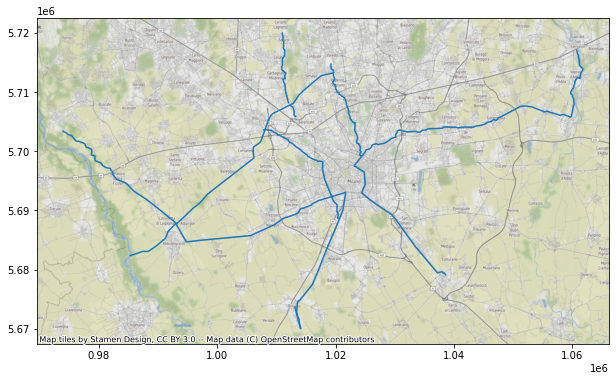

In [4]:
ax = corsi3857[corsi3857.within(province3857[province3857.DEN_UTS == 'Milano'].geometry.item())].sort_values(by='SHAPE_LEN', ascending=False).head(10).plot(figsize=(12,6))
contextily.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

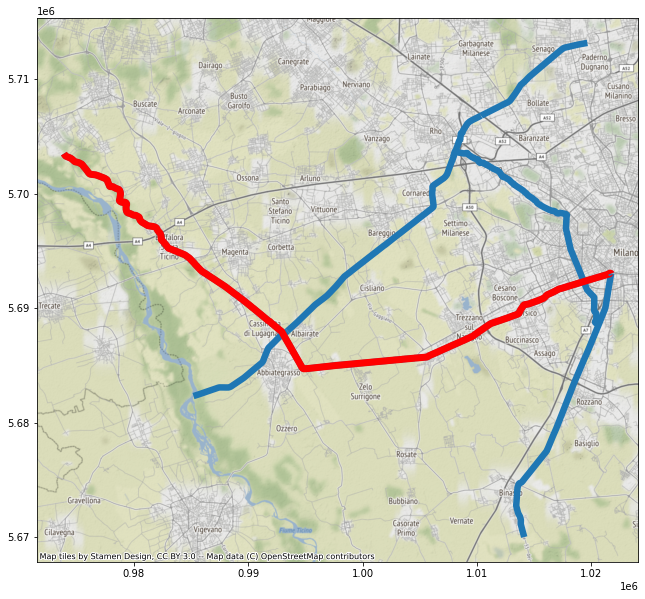

In [5]:
ax = corsi3857[corsi3857.intersects(corsi3857[corsi3857.NOME == 'Naviglio Grande (Canale)'].geometry.item())].plot(figsize=(20,10), linewidth=6.5)
corsi3857[corsi3857.NOME == 'Naviglio Grande (Canale)'].plot(ax = ax, edgecolor='r', linewidth=7.0)
contextily.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [6]:
comuniprovincia = comuni3857[comuni3857.within(province3857[province3857.DEN_UTS == 'Milano'].geometry.item())]

Inserisci il nome del comune: Bresso


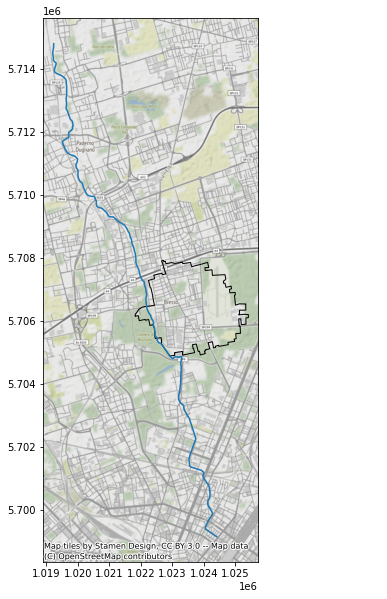

In [7]:
inputcomune = input('Inserisci il nome del comune: ')
if inputcomune in comuniprovincia.COMUNE.tolist():
 ax = corsi3857[corsi3857.intersects(comuni3857[comuni3857.COMUNE == inputcomune].geometry.item())].plot(figsize=(20,10))
 comuni3857[comuni3857.COMUNE == inputcomune].plot(ax=ax, facecolor='None', edgecolor='k')
 contextily.add_basemap(ax)
 if len(corsi3857[corsi3857.intersects(comuni3857[comuni3857.COMUNE == inputcomune].geometry.item())]) < 1:
   print("Nessun corso d'acqua passa per", inputcomune)
elif inputcomune not in comuniprovincia.COMUNE.tolist() and inputcomune in comuni.COMUNE.tolist():
  print(inputcomune, 'non si trova in provincia di Milano.')
else:
  print(inputcomune, 'non si trova in Italia o non esiste come comune.')

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

Inserisci il nome del fiume: Naviglio Grande (Canale)


/usr/local/lib/python3.8/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


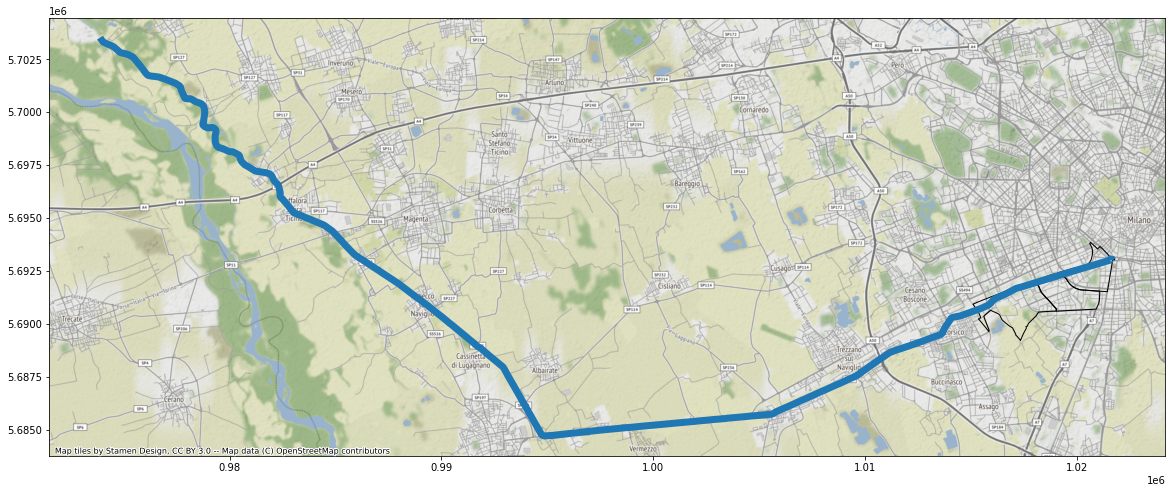

In [33]:
inputfiume = input('Inserisci il nome del fiume: ')
if inputfiume in corsi.NOME.tolist() and corsi3857[corsi3857.NOME == inputfiume].crosses(comuni3857[comuni3857.COMUNE == 'Milano']).bool:
  ax = quartieri3857[quartieri3857.intersects(corsi3857[corsi3857.NOME == inputfiume].geometry.item())].plot(figsize=(20,10), facecolor='None', edgecolor='k')
  corsi3857[corsi3857.NOME == inputfiume].plot(ax=ax, linewidth=7.0)
  contextily.add_basemap(ax)
elif inputfiume in corsi.NOME.tolist() :
  ax = comuni3857[comuni3857.intersects(corsi3857[corsi3857.NOME == inputfiume].geometry.item())].plot(figsize=(20,10), facecolor='None', edgecolor='k')
  corsi3857[corsi3857.NOME == inputfiume].plot(ax=ax, linewidth=7.0)
  contextily.add_basemap(ax)
elif inputcomune not in corsi.NOME.tolist():
  print(inputfiume, 'non si trova nella lista di fiumi.')

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [29]:
print('Numero di corsi in provincia di Milano:',len(corsi3857[corsi3857.crosses(province3857[province3857.DEN_UTS == 'Milano'].geometry.item())]))
print("Lunghezza totale di tutti i corsi d'acqua:", round(sum(corsi3857[corsi3857.crosses(province3857[province3857.DEN_UTS == 'Milano'].geometry.item())]['SHAPE_LEN'])), 'metri')

Numero di corsi in provincia di Milano: 25
Lunghezza totale di tutti i corsi d'acqua: 717761 metri


6. visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

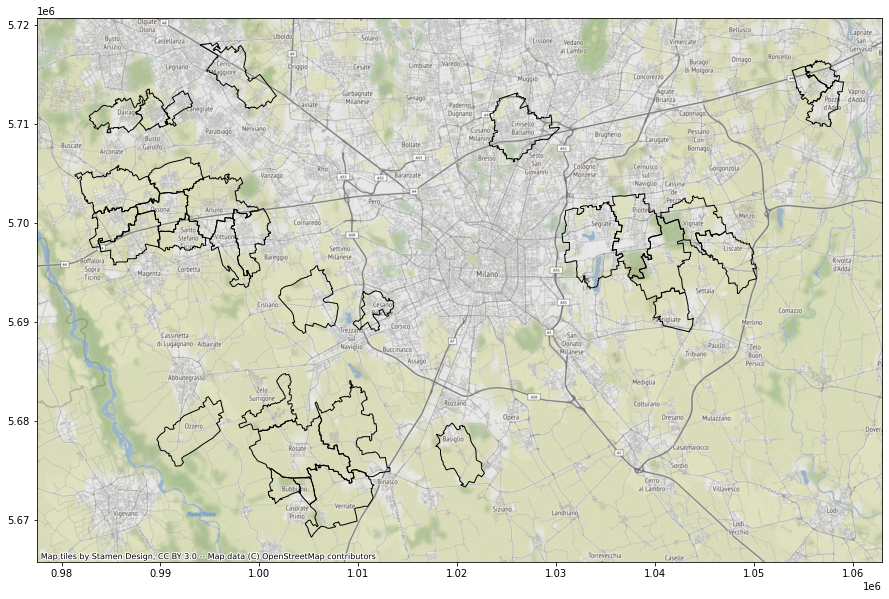

In [51]:
comuniProvinciaAttraversati = comuniprovincia[comuniprovincia.intersects(corsi3857.unary_union)]
ax = comuniprovincia.drop(comuniProvinciaAttraversati.index).plot(figsize=(20,10), edgecolor='k', facecolor='None')
contextily.add_basemap(ax)